# Teste 3

#### Beatriz Evelbauer 

Queremos calcular 

$$ \int_0^{T} W_t dW_t \approx \sum_{j=1}^{n} W_{t_{j-1}} (W_{t_j} - W_{t_{j-1}}) $$

com os seguintes parâmetros:

* $T=1$ - tempo final
* $m=100$ - número de amostras de $W_t$
* $n=100$ - número de pontos na malha



In [1]:
using Plots, Distributions, Random
theme(:ggplot2)

rng = MersenneTwister(1234)

MersenneTwister(1234)

Primeiro vamos gerar as amostras do processo de Wiener.

In [39]:
# definindo parametros
T = 1
m = 1000
n = 100

# calculando todos os tempos 
ts = [j*T/n for j ∈ 1:n]
nothing

In [40]:
Is = zeros(m) # vetor para guardar as integrais de cada amostras

for i ∈ 1:m 
    # gerando cada amostra 
    Wt = randn(n+1) .* .√ts 

    # calculando a integral dessa amostra 
    dW = Wt[2:n+1] .- Wt[1:n]
    Is[i] = sum(Wt[1:n] .* dW)
end

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 101 and 100

In [44]:
Is = zeros(m) # vetor para guardar as integrais de cada amostras

for i ∈ 1:m 
    aux = zeros(n)
    for j ∈ 1:n
        gamma1 = rand(Gamma(0.5,2*T/n)) *√(j*(j-1))
        gamma2 = rand(Gamma(0.5,ts[j]))
        aux[j] = gamma1 - gamma2
    end
    Is[i] = sum(aux)
end

Agora, vamos comparar aos histogramas de

$$\frac{W_T^2}{2} - \frac{T}{2} $$

e de 

$$ - \frac{T}{2} + \frac{1}{2} \Gamma \left( \frac{1}{2}, T \right) $$

In [42]:
# gerando as amostras 
aprox = 0.5 .* (randn(m).^2 .- T)
gamma = Gamma(0.5,2*T)

approx_gamma = 0.5 .* (rand(gamma,m) .- T)
nothing

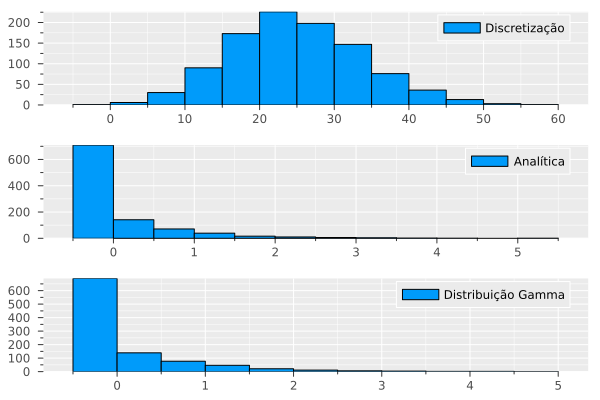

In [45]:
p1 = histogram(Is, bins=20, label="Discretização")
p2 = histogram(aprox,bins=20, label="Analítica")
p3 = histogram(approx_gamma, bins=20, label="Distribuição Gamma")
plot(p1,p2,p3, layout=(3,1))

## Variando os parâmetros 

Em geral, vamos refinar a malha e aumentar um pouco o número de amostras.

In [18]:
# definindo parametros
T = 1
m = 10000
n = 1000

# calculando todos os tempos 
ts = [j*T/n for j ∈ 0:n]
nothing

In [21]:
Is = zeros(m) # vetor para guardar as integrais de cada amostras

for i ∈ 1:m 
    # gerando cada amostra 
    Wt = randn(n+1) .* .√ts 

    # calculando a integral dessa amostra 
    dW = Wt[2:n+1] .- Wt[1:n]
    #dW = randn(n) .* (ts[2:n+1] .- ts[1:n])
    Is[i] = sum(Wt[1:n] .* dW)
end

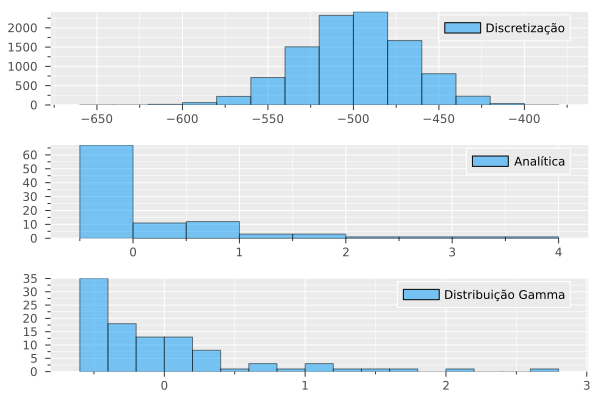

In [25]:
p1 = histogram(Is, bins=20, label="Discretização",alpha=0.5)
p2 = histogram(aprox,bins=20, label="Analítica",alpha=0.5)
p3 = histogram(approx_gamma, bins=20, label="Distribuição Gamma",alpha=0.5)
plot(p1,p2,p3, layout=(3,1))

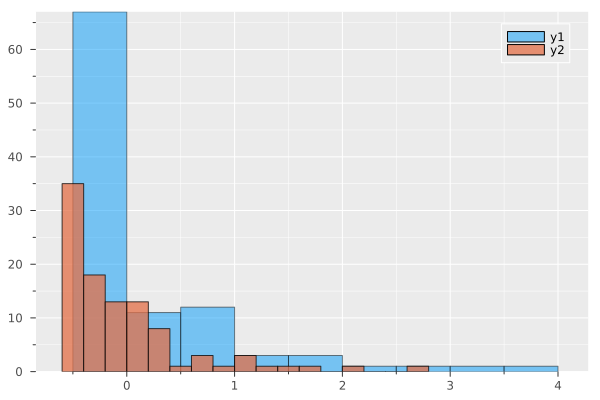

In [31]:
histogram(aprox,bins=20,alpha=0.5)
histogram!(approx_gamma,bins=20,alpha=0.75)